<a href="https://colab.research.google.com/github/Ansave/tensor-contraction/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Группа: М8О-107М-22

Студент: Савельев А.С.

##Задание
Имеются 5 тензоров: А, В, С, D, E, которые соединены как на рисунке. Задача - осуществить свертку тремя способами:


1.   Используя цикл for;
2.   Используя функции reshape и матричное произведение;
3.   Используя пакет ncon.

Сравнить способы:

Итогом свертки будет некий тензор R валентности 3.
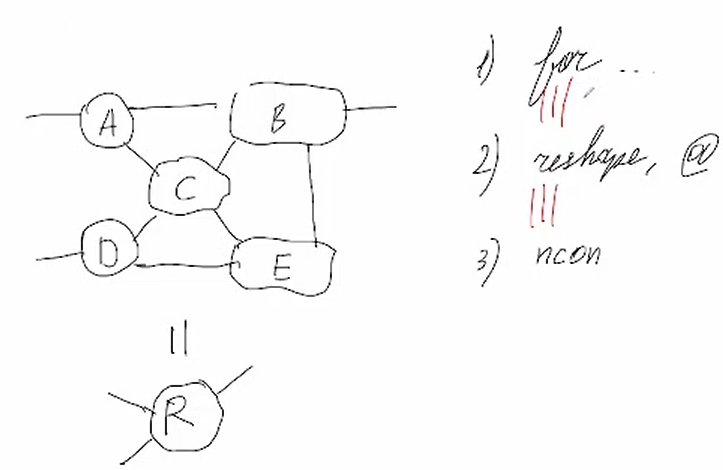

In [ ]:
!pip install ncon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from ncon import ncon
import numpy as np
import time

In [ ]:
# Свёртка через for
def convolution_for(a, b, c, d, e):

  start = time.time()
  ac = np.zeros((1, 2, 7, 5, 8))
  for i in range(1):
    for j in range(2):
      for k in range(7):
        for l in range(5):
          for m in range(8):
            for n in range(6): 
              ac[i,j,k,l,m] = ac[i,j,k,l,m] + a[i,j,n] * c[n,k,l,m]

  acb = np.zeros((1, 5, 8, 1, 3))
  for i in range(1):
    for l in range(5):
      for m in range(8):
        for f in range(1):
          for o in range(3):
            for p in range(2):
              for r in range(7):  
                acb[i,l,m,f,o] = acb[i,l,m,f,o] + ac[i,p,r,l,m] * b[p,r,o,f]
  
  acbe = np.zeros((1, 5, 1, 4))
  for i in range(1):
    for l in range(5):
      for f in range(1):
        for s in range(4):
          for t in range(8):
            for u in range(3):
              acbe[i,l,f,s] = acbe[i,l,f,s] + acb[i,l,t,f,u] * e[u,t,s]
  
  result  = np.zeros((1, 1, 1))
  for i in range(1):
    for f in range(1):
      for h in range(1):
        for q in range(5):
          for r in range(4):
            result[i,f,h] =  result[i,f,h] + acbe[i,q,f,r] + d[r,q,h]
  
  print("\nЧерез For:")
  print(f"Shape = {result.shape}")
  print(f"Результат: {result}")
  print(f"Врем выполнения: {time.time() - start}")

In [ ]:
# Свёртка через reshape
def convolution_reshape(a, b, c, d, e):

  start = time.time()
  ac = np.tensordot(a,c, axes=([2],[0]))
  acb = np.tensordot(ac,b, axes=([1,2],[0,1]))
  acbe = np.tensordot(acb,e, axes=([2,3],[1,0]))
  result = np.tensordot(acbe,d, axes=([1,2],[1,2]))

  print("\nЧерез RESHAPE")
  print(f"Shape = {result.shape}")
  print(f"Результат: {result}")
  print(f"Врем выполнения: {time.time() - start}")

In [ ]:
# Свёртка через ncon
def convolution_ncon(a, b, c, d, e):

  start = time.time()
  result = ncon((a, b, c, d, e), ([-1, 1, 5], [1, 6, 2, -2], [5, 6, 4, 7], [3, 4, -3], [2, 7, 3]))

  print("\nЧерез NCON")
  print(f"Shape = {result.shape}")
  print(f"Результат: {result}")
  print(f"Врем выполнения: {time.time() - start}")

<img src='https://sun1-22.userapi.com/impg/2wdeCLgFVP6nxdQ7HAykgJzrQAA-N54ksB9q7Q/YlzWzPaRkb4.jpg?size=824x520&quality=96&sign=d37f84bd8149582a0aa83ecb4f020994&type=album'>

In [ ]:
a = np.random.uniform(-1,1,(1, 2, 6))
b = np.random.uniform(-1,1,(2, 7, 3, 1))
c = np.random.uniform(-1,1,(6, 7, 5, 8))
d = np.random.uniform(-1,1,(4, 5, 1))
e = np.random.uniform(-1,1,(3, 8, 4))
convolution_for(a, b, c, d, e)
convolution_reshape(a, b, c, d, e)
convolution_ncon(a, b, c, d, e)


Через For:
Shape = (1, 1, 1))
Результат: [[[13.53134186]]]
Врем выполнения: 0.010254621505737305

Через RESHAPE
Shape = (1, 4, 4)
Результат: [[[-0.76980306 -7.35650289  1.60321867 -4.15638597]
  [ 4.50874834 -4.54047523 -4.31940675 -1.77762307]
  [-4.13990461  0.51234192  2.31605136  2.68315186]
  [ 4.28313826  4.16904417  3.13280315  0.67848911]]]
Врем выполнения: 0.002308368682861328

Через NCON
Shape = (1, 1, 1)
Результат: [[[-2.31573781]]]
Врем выполнения: 0.001323699951171875
